# Model Prepartion and Analysis 

In [61]:
df <- read.csv(file = file.choose(), header = T)

dftrain <- df
# taking backup of the dataset
dftb <- dftrain 
# structure of the training dataset
str(dftrain)

'data.frame':	480 obs. of  13 variables:
 $ Loan_ID          : Factor w/ 480 levels "LP001003","LP001005",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender           : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Married          : Factor w/ 2 levels "No","Yes": 2 2 2 1 2 2 2 2 2 2 ...
 $ Dependents       : Factor w/ 4 levels "0","1","2","3+": 2 1 1 1 3 1 4 3 2 3 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 2 1 1 2 1 1 1 1 ...
 $ Self_Employed    : Factor w/ 2 levels "No","Yes": 1 2 1 1 2 1 1 1 1 1 ...
 $ ApplicantIncome  : int  4583 3000 2583 6000 5417 2333 3036 4006 12841 3200 ...
 $ CoapplicantIncome: int  1508 0 2358 0 4196 1516 2504 1526 10968 700 ...
 $ LoanAmount       : int  128 66 120 141 267 95 158 168 349 70 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 0 1 1 1 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 1 3 3 3 3 3 2 3 2 3 ...
 $ Loan_Status    

In [128]:
# partitioning datset -> Training : Validation :: 60 : 40

partidx <- sample(1:nrow(dftb), 0.6*nrow(dftb), replace = F)
dftrain <- dftb[partidx,]
dfvalid <- dftb[-partidx,]
# removing loan id column
dftrain <- dftrain[,-c(1)]
dfvalid <- dfvalid[,-c(1)]

## Decision Tree Model

In [129]:
# loading libraries
library(rpart)
library(rpart.plot)

# rel error is the ratio of incorrectly classified traiining records
# after doing a split to incorrectly classified training records
# at the root node (naive  rule)

# xval (default value = 10)
# pruning using rpart's prune
mod1 <- rpart(Loan_Status ~ ., method = "class", data = dftrain, 
              control = rpart.control(cp = 0, minsplit = 2, minbucket = 1, 
                                      maxcomplete = 0, maxsurrogate = 0,
                                      xval = 10)
              )

### Having a look at the cp table and cp value with least xerror value

In [130]:
mod1$cptable

mod1$cptable[which.min(mod1$cptable[,"xerror"]),]

,CP,nsplit,rel error,xerror,xstd
1,0.329787234,0,1.00000000,1.0000000,0.08465268
2,0.021276596,1,0.67021277,0.6702128,0.07463412
3,0.015957447,8,0.51063830,0.7446809,0.07743783
4,0.014184397,14,0.41489362,0.8191489,0.07990289
5,0.010638298,19,0.34042553,0.8085106,0.07957023
6,0.007978723,29,0.23404255,0.9148936,0.08262297
7,0.007092199,33,0.20212766,1.0106383,0.08488215
8,0.006079027,47,0.09574468,1.0319149,0.08532542
9,0.005319149,55,0.04255319,1.0531915,0.08574808
10,0.000000000,63,0.00000000,1.0531915,0.08574808


CP     nsplit  rel error     xerror       xstd 
0.02127660 1.00000000 0.67021277 0.67021277 0.07463412

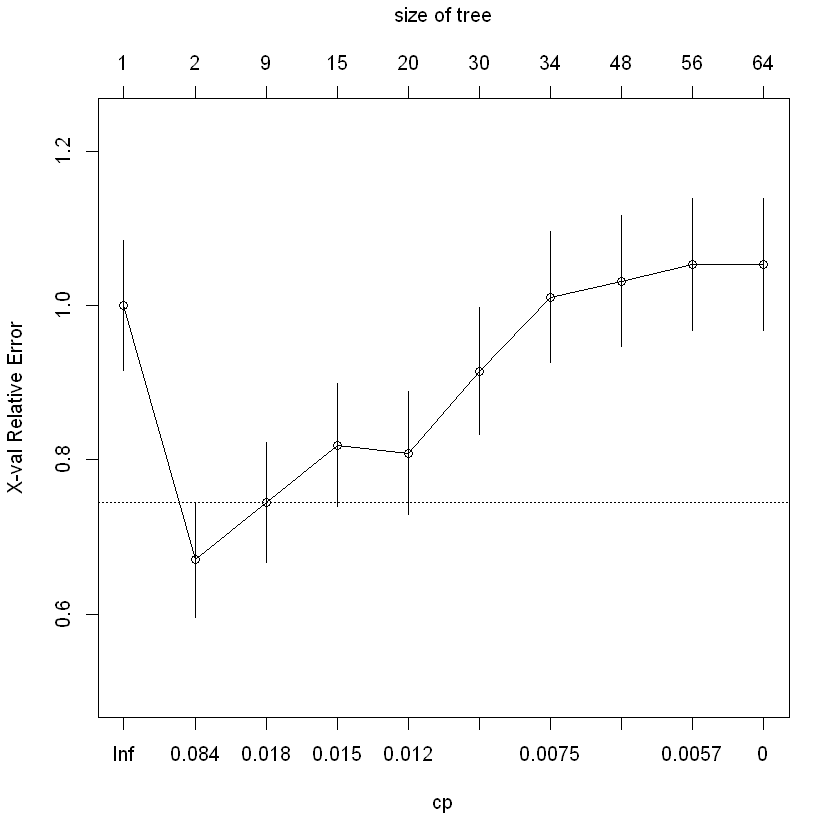

In [131]:
#  xerror  contains estimates of cross-validated prediction error
# for different numbers of splits (nsplit)
# below is the cp value corresponding to minimum xerror value
cp1 <- mod1$cptable[which.min(mod1$cptable[,"xerror"]),"CP"]
plotcp(mod1)

### Pruning Tree

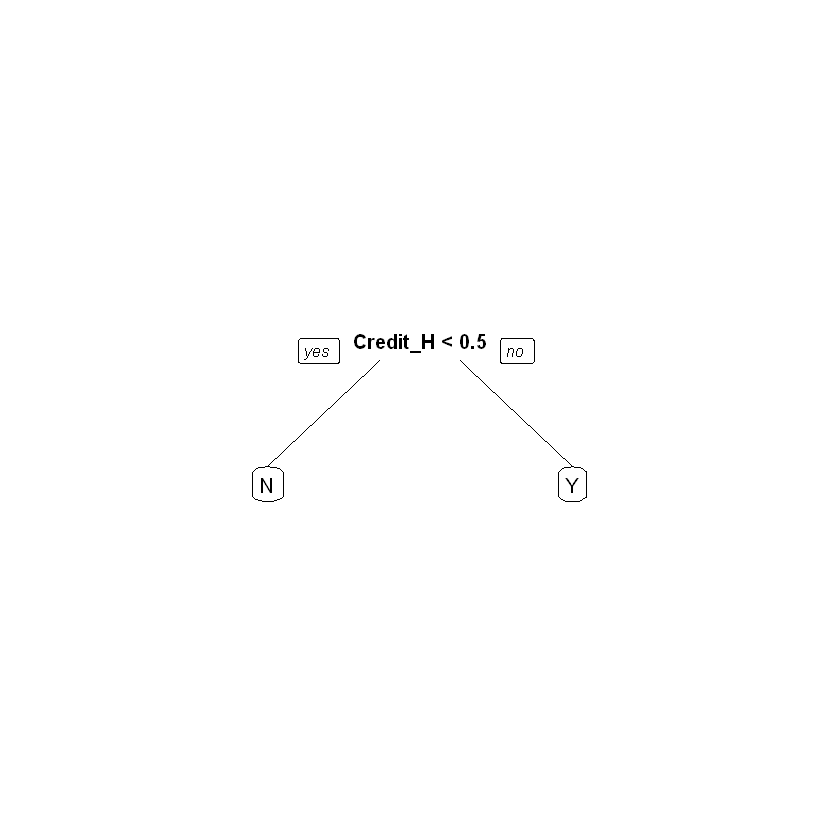

In [132]:
pmod <- prune(mod1, cp = cp1)
prp(pmod)

### Performance on Training Partition

In [133]:
# performance on training partition
bmodtr <- predict(pmod, dftrain, type = "class")
#classification accuracy #0.82
mean(bmodtr == dftrain$Loan_Status) 
# misclassification error #0.17
mean(bmodtr != dftrain$Loan_Status)

[1] 0.78125

[1] 0.21875

### Performance on Validation Partition

In [134]:
# performance on validation partition
bmodvr <- predict(pmod, dfvalid, type = 'class')
#classification accuracy #0.82
mean(bmodvr == dfvalid$Loan_Status)
# misclassification error #0.17
mean(bmodvr != dfvalid$Loan_Status)

[1] 0.8489583

[1] 0.1510417


## Logistic Regression Model 

In [138]:
# Preparing model
mod2 <- glm(Loan_Status ~ ., family = binomial(link = "logit"),
            data = dftrain)
summary(mod2)


Call:
glm(formula = Loan_Status ~ ., family = binomial(link = "logit"), 
    data = dftrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5332  -0.4933   0.4778   0.7673   2.0600  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.652e+00  1.184e+00  -1.395 0.163143    
GenderMale              2.137e-01  4.332e-01   0.493 0.621815    
MarriedYes              4.445e-01  3.771e-01   1.179 0.238545    
Dependents1            -2.404e-01  4.353e-01  -0.552 0.580692    
Dependents2             6.662e-01  5.053e-01   1.318 0.187355    
Dependents3+            2.979e-01  6.104e-01   0.488 0.625515    
EducationNot Graduate  -4.401e-01  3.842e-01  -1.145 0.252016    
Self_EmployedYes        2.618e-01  4.766e-01   0.549 0.582726    
ApplicantIncome        -1.416e-05  3.843e-05  -0.369 0.712480    
CoapplicantIncome      -4.917e-05  4.991e-05  -0.985 0.324531    
LoanAmount             -3.607e-03  2.199e-03  -1.64

### Performance on Training Partition 

In [140]:
# on training partition
lrmodrt <- predict(mod2, dftrain, type = "response")
lrmodrt <- ifelse(lrmodrt > 0.5,"Y","N")
lrmodrt <- as.factor(lrmodrt)
#classification accuracy #0.80
mean(lrmodrt == dftrain$Loan_Status)
# misclassification error #0.19
mean(lrmodrt != dftrain$Loan_Status)

[1] 0.8055556

[1] 0.1944444

### Performance on Validation Partition

In [141]:
# on validation partition
lrmodrv <- predict(mod2, dfvalid, type = "response")
lrmodrv <- ifelse(lrmodrv > 0.5,"Y","N")
lrmodrv <- as.factor(lrmodrv)
#classification accuracy #0.79
mean(lrmodrv == dfvalid$Loan_Status)
# misclassification error #0.20
mean(lrmodrv != dfvalid$Loan_Status)

[1] 0.84375

[1] 0.15625

In [142]:
save(mod1,pmod,mod2,dftrain,dfvalid, file = file.choose())